<a href="https://colab.research.google.com/github/nisanuro/CNG562-Assignment-2/blob/naive/CNG562_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn import metrics, datasets, preprocessing
%matplotlib inline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [0]:
def randomOneHoldout(X_train, Y_train):

  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

  return x_train, x_test, y_train, y_test

In [0]:
def stratifiedOneHoldout(X_train, Y_train):
  
  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0, stratify=Y_train)
  
  return x_train, x_test, y_train, y_test

In [0]:
def NaiveBayes(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    gaussian = GaussianNB()
    categorical = CategoricalNB()
    bernoulli = BernoulliNB()
    complement = ComplementNB()
    multinomial = MultinomialNB()

    models = [gaussian, categorical, bernoulli, complement, multinomial]

    # 5-Fold
    print("\n5-Fold")
    for i in models:
        cv = cross_val_score(i, X_train, Y_train, cv=5, scoring='accuracy')
        print(str(i).split('N')[0] + " Naive Bayes Accuracy: ", cv.mean()*100)

    # 10-Fold
    print("\n10-Fold")
    for i in models:
        cv = cross_val_score(i, X_train, Y_train, cv=10, scoring='accuracy')
        print(str(i).split('N')[0] + " Naive Bayes Accuracy: ", cv.mean()*100)

    # Random One Holdout
    x_train, x_test, y_train, y_test = randomOneHoldout(X_train, Y_train)

    print("\nRandom One Holdout")
    for i in models:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        print(str(i).split('N')[0] + " Naive Bayes Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


    # Stratified One Holdout
    x_train, x_test, y_train, y_test = stratifiedOneHoldout(X_train, Y_train)
    
    print("\nStratified One Holdout")
    for i in models:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        print(str(i).split('N')[0] + " Naive Bayes Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)                  


In [0]:
def DecisionTree(X, Y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    
    # 5-Fold
    print("\n5-Fold: ")
    tuningDepth(X_train, Y_train, 0)

    # 10-Fold
    print("\n10-Fold: ")
    tuningDepth(X_train, Y_train, 1)

    # Random One Holdout
    print("\nRandom One Holdout: ")   
    tuningDepth(X_train, Y_train, 2)
  
    # Stratified One Holdout
    print("\nStratified One Holdout: ")
    tuningDepth(X_train, Y_train, 3)
    
    #
    #   Continue with 10-Fold, Depth = 3
    #
    
    print("5-Fold, Depth=5\n")
    tuningSplit(X_train, Y_train)
    
    #
    #   Continue with criterion = 'gini', splitter = 'best', min_samples_split = 2
    #                     all of them are default values
    print("5-Fold, depth = 5, criterion = 'gini', splitter = 'best, min_samples_split = 2\n")
    tuningClassWeight(X_train, Y_train)

    #
    #   Continue with class_weight = None,   default
    #
    
    clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
    clf.fit(X_train, Y_train)
    
    y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred)*100)


In [0]:
def tuningClassWeight(X_train, Y_train):
    # No class weight
    clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
    clf.fit(X_train, Y_train)

    cv = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
    print("Class weight: None           Accuracy: ", cv.mean()*100)

    # Balanced class weight
    clf = DecisionTreeClassifier(max_depth = 3, random_state = 0, class_weight ='balanced')
    clf.fit(X_train, Y_train)

    cv = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
    print("Class weight: Balanced       Accuracy: ", cv.mean()*100)

In [0]:
def tuningSplit(X_train, Y_train):
    criterion = ["gini", "entropy"]
    splitter = ["best", "random"]

    for i in criterion:
        for j in splitter:
            clf = DecisionTreeClassifier(criterion = i, splitter = j, max_depth = 3, random_state = 0)
            clf.fit(X_train, Y_train)

            cv = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
            print("Criterion: ", i, "   Splitter: ", j, "   Accuracy: ", cv.mean()*100)

    for i in range(2, 10):
        clf = DecisionTreeClassifier(max_depth = 3, min_samples_split = i, random_state = 0)
        clf.fit(X_train, Y_train)

        cv = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
        print("min_samples_split: ", i, "   Accuracy: ", cv.mean()*100)

In [0]:
def tuningDepth(X_train, Y_train, val):

    max_depth_range = list(range(1, 10))

    table0 = []
    table1 = []
    table2 = []
    table3 = []


    for depth in max_depth_range:
        if (val == 0):
            clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
            clf.fit(X_train, Y_train)

            cv = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
            accuracy = cv.mean()*100
            print("Depth: ", depth, " Accuracy: ", accuracy)
            table0.append([depth, accuracy])

        elif (val == 1):
            clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
            clf.fit(X_train, Y_train)

            cv = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
            accuracy = cv.mean()*100
            print("Depth: ", depth, " Accuracy: ",accuracy)
            table1.append([depth, accuracy])

        elif(val == 2):
            x_train, x_test, y_train, y_test = randomOneHoldout(X_train, Y_train)

            clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
            clf.fit(x_train, y_train)

            accuracy = clf.score(x_test, y_test)*100
            print("Depth: ", depth, " Accuracy: ", accuracy)
            table2.append([depth, accuracy])

        elif(val == 3):
            x_train, x_test, y_train, y_test = stratifiedOneHoldout(X_train, Y_train)

            clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
            clf.fit(x_train, y_train)

            accuracy = clf.score(x_test, y_test)*100
            print("Depth: ", depth, " Accuracy: ", accuracy)
            table3.append([depth, accuracy])

        else:
            print("Invalid validation tech.")

    
    print("5-Fold")
    table0 = np.array(table0)
    table0 = np.vstack(table0)
    y = table0[:,1] 
    x = table0[:,0]

    plt.plot(x, y, 'o-')
    plt.show()
    
    print("10-Fold")

    table1 = np.vstack(table0)
    y = table1[:,1] 
    x = table1[:,0]

    plt.plot(x, y, 'o-')
    plt.show()

    print("Random One Holdout")

    table2 = np.vstack(table0)
    y = table2[:,1] 
    x = table2[:,0]

    plt.plot(x, y, 'o-')
    plt.show()

    print("Stratified One Holdout")

    table3 = np.vstack(table0)
    y = table3[:,1] 
    x = table3[:,0]

    plt.plot(x, y, 'o-')
    plt.show()
    


In [0]:
def displayAccuracy(X, Y):
    
    #NaiveBayes(X, Y)
    DecisionTree(X, Y)

In [0]:
def zValues(df):
    
    cols = list(df.columns)
    cols.remove('Index')

    for col in cols:
        col_zscore = col + '_zscore'
        df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

    return df

In [0]:
def outliers(df):  
    return df.loc[(df._1_zscore > 2.5) | (df._2_zscore > 2.5) | (df._2_zscore > 2.5) | (df._3_zscore > 2.5)]

In [0]:
def dropOutliers(df):
    df = df.drop([15, 24, 44, 117, 131])
    return df 

In [0]:
def subDatasets(df):
    target0 = []
    target1 = []
    target2 = []
    for row in df.itertuples():
        if row.target == 0:
            target0.append(row)
            target0_df = pd.DataFrame(target0)
        elif row.target == 1:
            target1.append(row)
            target1_df = pd.DataFrame(target1)
        else:
            target2.append(row)    
            target2_df = pd.DataFrame(target2)  

    dfs = [target0_df, target1_df, target2_df]  

    for df in dfs:
        df.drop(columns=['target'])
    
    return target0_df, target1_df, target2_df


5-Fold: 
Depth:  1  Accuracy:  69.52380952380952
Depth:  2  Accuracy:  93.33333333333333
Depth:  3  Accuracy:  94.28571428571428
Depth:  4  Accuracy:  93.33333333333333
Depth:  5  Accuracy:  93.33333333333333
Depth:  6  Accuracy:  94.28571428571428
Depth:  7  Accuracy:  94.28571428571428
Depth:  8  Accuracy:  94.28571428571428
Depth:  9  Accuracy:  94.28571428571428
5-Fold


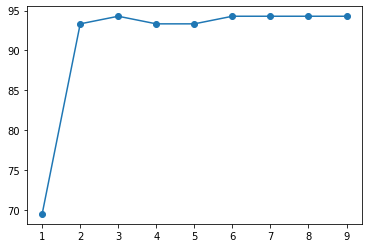

10-Fold


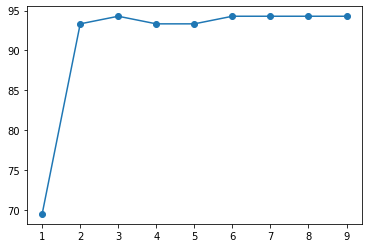

Random One Holdout


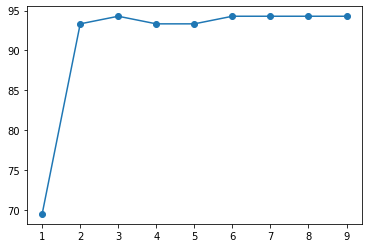

Stratified One Holdout


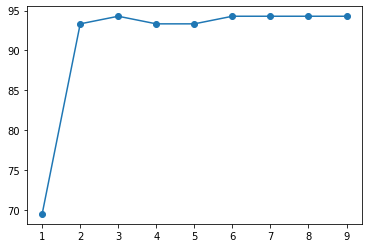


10-Fold: 
Depth:  1  Accuracy:  69.54545454545456
Depth:  2  Accuracy:  95.18181818181817
Depth:  3  Accuracy:  98.00000000000001
Depth:  4  Accuracy:  96.0909090909091
Depth:  5  Accuracy:  96.0909090909091
Depth:  6  Accuracy:  96.0909090909091
Depth:  7  Accuracy:  96.0909090909091
Depth:  8  Accuracy:  96.0909090909091
Depth:  9  Accuracy:  96.0909090909091
5-Fold


ValueError: ignored

In [382]:
if __name__ == '__main__':

  iris = datasets.load_iris()
  
  X = iris.data
  Y = iris.target
  
  # L1 normalization
  l1_norm = preprocessing.normalize(X, norm="l1")
  # Mean removal
  mean_removal = preprocessing.scale(X)

  #Displaying result according to each type of methods and regression model
  #print("\nRaw: ")
  displayAccuracy(X,Y)
  '''
  print("\nL1 Normalization: ")
  displayAccuracy(l1_norm,Y)
  
  print("\nMean Removal: ")
  displayAccuracy(mean_removal,Y)'''

  df = pd.DataFrame(iris.data, columns=iris.feature_names)
  df['target'] = iris.target
  pd.set_option('display.max_rows', df.shape[0]+1)
 
  t0, t1, t2 = subDatasets(df)
  
  z0 = zValues(t0)
  z1 = zValues(t1)
  z2 = zValues(t2)
  
  out0 = outliers(z0)
  out1 = outliers(z1)
  out2 = outliers(z2)

In [0]:
#out0

In [0]:
#out1

In [0]:
#out2

In [0]:
#df = dropOutliers(df)
#df

In [0]:
#iris = df.to_numpy()
